In [2]:
# 데이터 불러오기
election <- read.csv("../RFile/election_2022.csv")

In [3]:
head(election)
tail(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
243,경상남도,함양군,34459,26955,8526,16957,528
244,경상남도,산청군,31645,24913,7125,16607,464
245,경상남도,거창군,53049,41399,11963,27254,895
246,경상남도,합천군,39768,31270,6911,22742,511
247,제주특별자치도,제주시,408552,296826,157695,122084,10007
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


In [4]:
str(election)

'data.frame':	248 obs. of  7 variables:
 $ 광역시도: Factor w/ 17 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ 시군구  : Factor w/ 226 levels "가평군","강남구",..: 177 178 150 99 29 62 179 100 5 60 ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


In [6]:
summary(election)

       광역시도      시군구       선거인수          투표수      
 경기도    :41   동구   :  6   Min.   :  8141   Min.   :  6653  
 서울특별시:25   중구   :  6   1st Qu.: 47672   1st Qu.: 39216  
 경상북도  :24   서구   :  5   Median :154354   Median :114654  
 경상남도  :22   남구   :  4   Mean   :176570   Mean   :136148  
 전라남도  :22   북구   :  4   3rd Qu.:265099   3rd Qu.:204189  
 강원도    :18   강서구 :  2   Max.   :703896   Max.   :542027  
 (Other)   :96   (Other):221                                    
     이재명           윤석열           심상정     
 Min.   :  1590   Min.   :  2052   Min.   :  109  
 1st Qu.: 17363   1st Qu.: 18223   1st Qu.:  709  
 Median : 48797   Median : 50341   Median : 2618  
 Mean   : 64479   Mean   : 65566   Mean   : 3216  
 3rd Qu.: 99831   3rd Qu.:101950   3rd Qu.: 5041  
 Max.   :285227   Max.   :275155   Max.   :13249  
                                                  

In [9]:
sum(is.na(election))

[1] 0

In [10]:
table(election$광역시도)


        강원도         경기도       경상남도       경상북도     광주광역시 
            18             41             22             24              5 
    대구광역시     대전광역시     부산광역시     서울특별시 세종특별자치시 
             8              5             16             25              1 
    울산광역시     인천광역시       전라남도       전라북도 제주특별자치도 
             5             10             22             15              2 
      충청남도       충청북도 
            16             13 

In [11]:
library(plotrix)

In [51]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



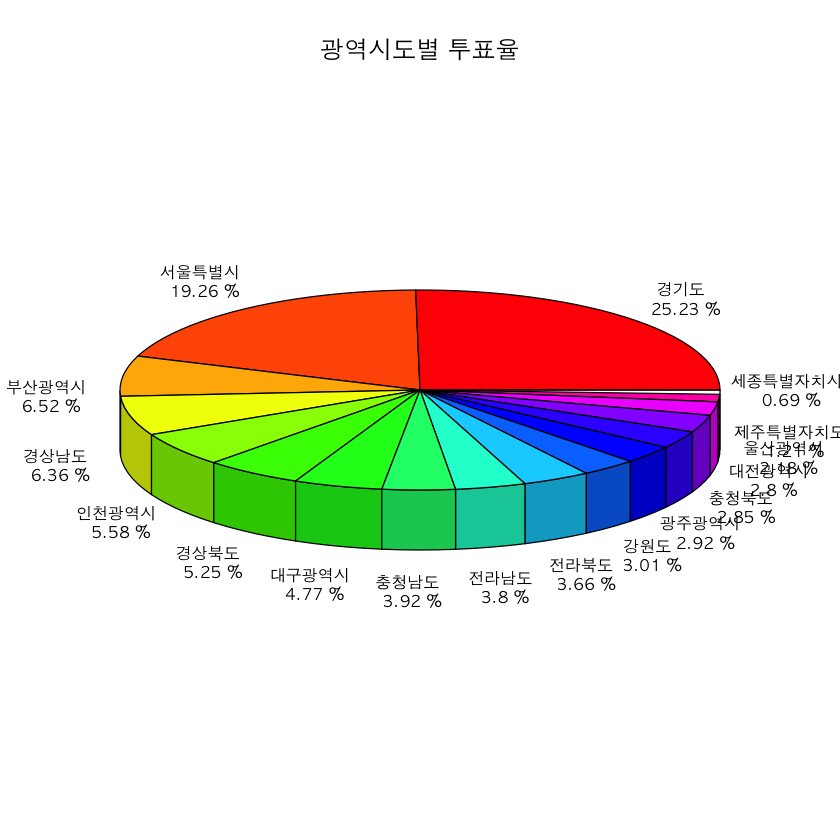

In [107]:
votes <- aggregate(투표수 ~ 광역시도,election,sum)
votes <- arrange(votes,desc(votes$투표수))

options(warn = -1)
투표수 <- votes$투표수
시군구 <- votes$광역시도
label <- paste(시군구,"\n", round(votes$투표수/sum(votes$투표수)*100,2),"%")

par(family = 'AppleGothic')
pie3D(투표수,
      main = "광역시도별 투표율",
      labels = label,
      labelcex = 0.8,
#       radius = 0.3 (파이 작아짐)
    )

In [76]:
election$electionSum <- apply(election[,5:7],1,sum)

In [77]:
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
서울특별시,종로구,129968,100629,46130,49172,3115,98417
서울특별시,중구,111448,84998,38244,42906,2310,83460
서울특별시,용산구,199077,152068,60063,85047,4374,149484
서울특별시,성동구,252087,197240,84411,103880,5365,193656
서울특별시,광진구,303582,235471,109922,113733,7072,230727
서울특별시,동대문구,300928,232106,108171,112890,6416,227477


In [80]:
# electionRatio <- 투표수 대비 electionSum의 퍼센트 구해서 넣기

election$electionRatio <- election$electionSum/election$투표수*100
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [95]:
# 3명의 후보를 가장 많이 선택한 지역과 가장 적게 선택한 지역 구하기

arrange(election, desc(electionRatio))[1,]
arrange(election, desc(electionRatio))[nrow(election),]

# 2) subset
subset(election, electionRatio == max(election$electionRatio))
subset(election, electionRatio == min(election$electionRatio))

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
248,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
82,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
59,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


In [99]:
# election_2022_job1.csv 로 저장하기

write.csv(election, "../RFile/election_2022_job1.csv", row.names = F)

In [97]:
election

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565
서울특별시,중랑구,347108,260862,130381,118201,6899,255481,97.93722
서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12141
서울특별시,강북구,268974,199448,103333,86540,5245,195118,97.82901
서울특별시,도봉구,281812,216036,106546,99780,5605,211931,98.09985


---

In [108]:
# 각 후보(윤석열, 이재명, 심상정)의 광역시도별 득표율을 3D Pie Chart로 표현하기
# (단, 득표율이 3% 미만인 광역시도는 광역시도 명만 출력하고 퍼센트는 출력하지 않는다./ 퍼센트 단위는 소수 한자리)

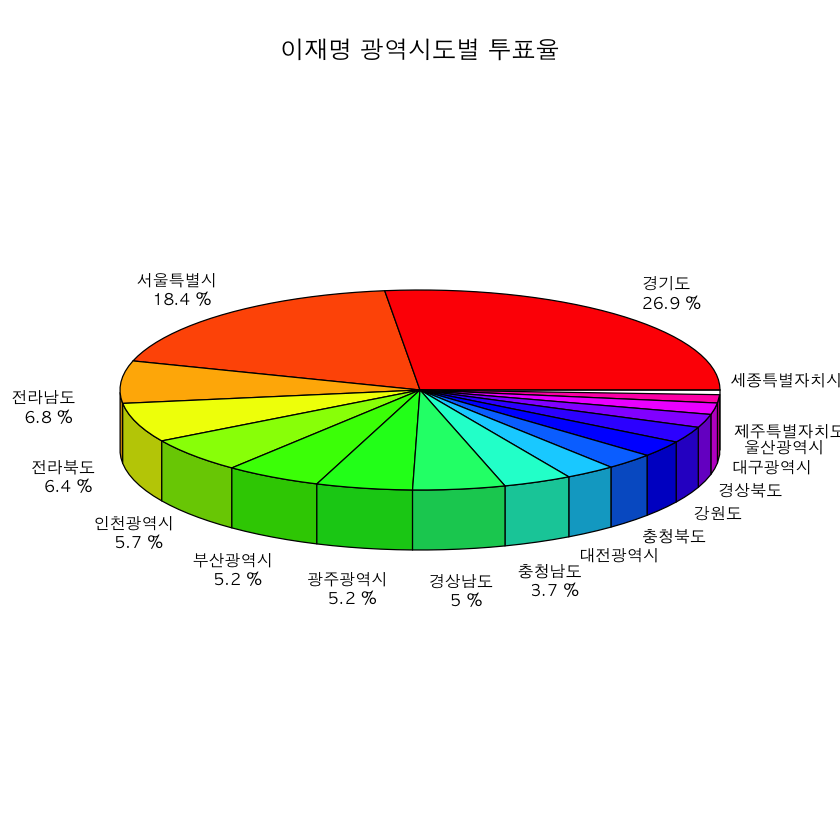

In [152]:
votes <- aggregate(이재명 ~ 광역시도,election,sum)
votes <- arrange(votes,desc(votes$이재명))

options(warn = -1)
투표수 <- votes$이재명
시군구 <- votes$광역시도
label <- paste(시군구,"\n", ifelse(votes$이재명/sum(votes$이재명)*100 >=3 ,paste(round(votes$이재명/sum(votes$이재명)*100,1),"%"),""))

par(family = 'AppleGothic')
pie3D(투표수,
      main = "이재명 광역시도별 투표율",
      labels = label,
      labelcex = 0.8,
#       radius = 0.3 (파이 작아짐)
    )

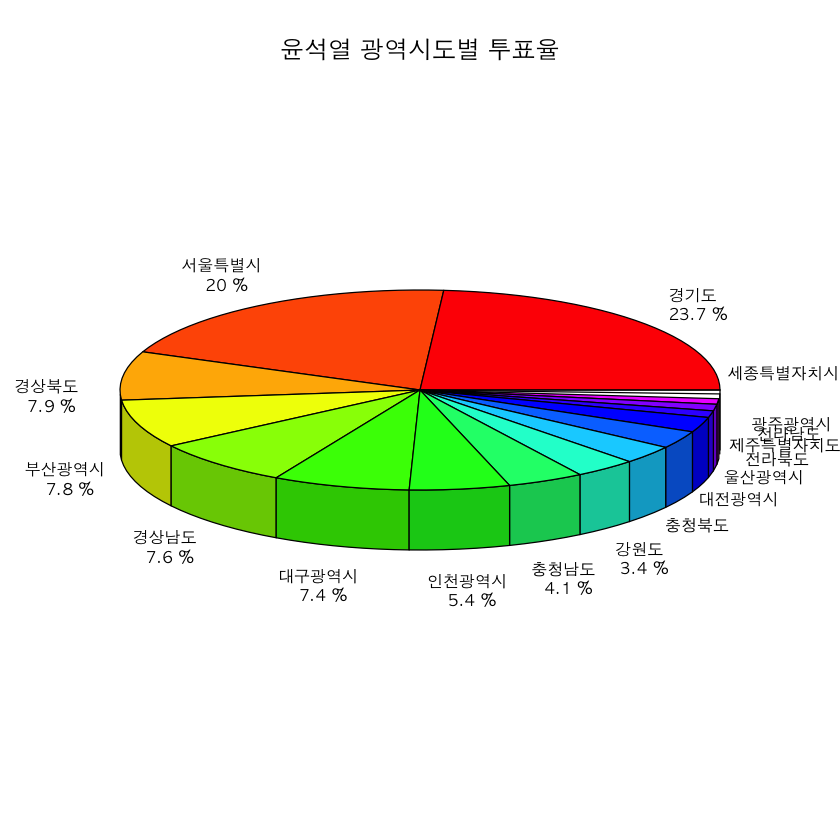

In [297]:
votes <- aggregate(윤석열 ~ 광역시도,election,sum)
votes <- arrange(votes,desc(votes$윤석열))

options(warn = -1)
투표수 <- votes$윤석열
시군구 <- votes$광역시도
label <- paste(시군구,"\n", ifelse(votes$윤석열/sum(votes$윤석열)*100 >=3 ,paste(round(votes$윤석열/sum(votes$윤석열)*100,1),"%"),""))

par(family = 'AppleGothic')
pie3D(투표수,
      main = "윤석열 광역시도별 투표율",
      labels = label,
      labelcex = 0.8,
#       radius = 0.3 (파이 작아짐)
    )

In [176]:
# 수도권(경기도, 서울, 인천)의 투표인구수의 퍼센트?
votes <- aggregate(투표수 ~ 광역시도,election,sum)
votes <- arrange(votes,desc(votes$투표수))

sum(votes$투표수[c(1,2,5)])/sum(votes$투표수)*100

[1] 50.06473

---
### 윤석열 후보의 서울 득표 Top5만 득표율로 표시하고 나머지 지역은 기타로 합치기

In [237]:
# 서울 특별시 Data만 발췌하기
#subset(election, 광역시도 == '서울특별시')

election_seoul <- election[election$광역시도=="서울특별시",]
election_seoul_윤석열 <- arrange(election_seoul, desc(윤석열))[,c(2,6)]
head(election_seoul_윤석열)

시군구,윤석열
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340
강동구,160593


In [242]:
# Ratio 구하기
election_seoul_윤석열_ratio <- 
        round(c(election_seoul_윤석열[1:5, 2],sum(election_seoul_윤석열[-c(1:5),2]))/
              sum(election_seoul_윤석열$윤석열) * 100,2)


election_seoul_윤석열_ratio

[1]  7.84  7.25  5.58  5.51  5.02 68.81

In [247]:
# Label 만들기
election_seoul_윤석열_label <-
        c(as.character(election_seoul_윤석열$시군구[1:5]), "기타")

election_seoul_윤석열_label

[1] "송파구" "강남구" "강서구" "서초구" "노원구" "기타"

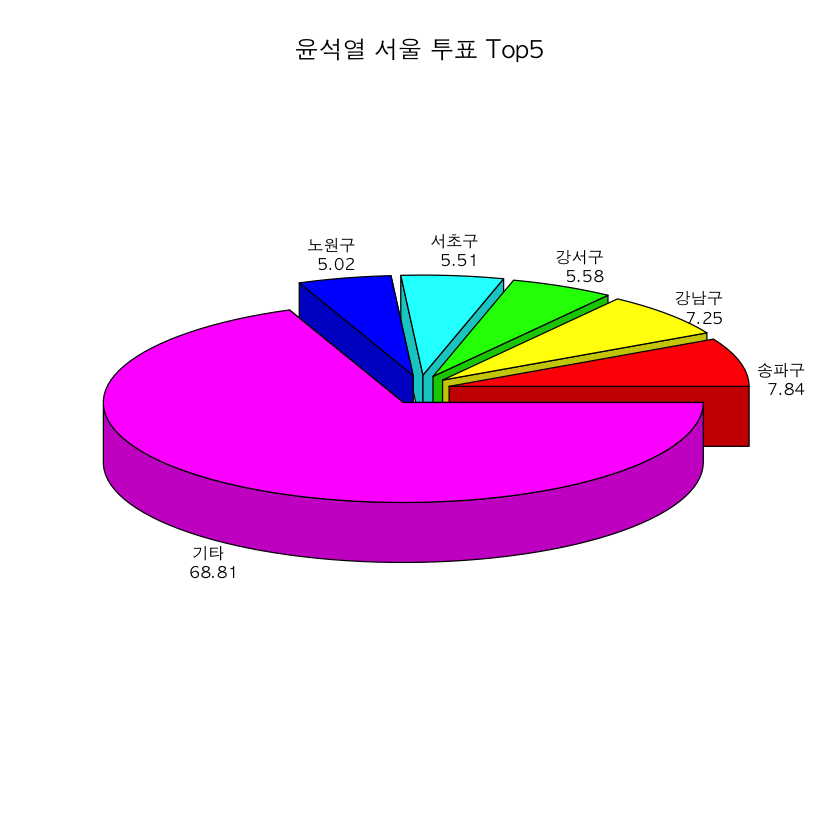

In [250]:


options(warn = -1)
ratio <- election_seoul_윤석열_ratio
시군구 <- election_seoul_윤석열_label
label <- paste(시군구,"\n", round(ratio,2))

par(family = 'AppleGothic')
pie3D(election_seoul_윤석열_ratio,
      main = "윤석열 서울 투표 Top5",
      labels = label,
      labelcex = 0.8,
      explode = 0.1
    )

In [ ]:
# 대선주자 출생지별 득표울 분석


In [294]:
election_seongbuk <- election[election$시군구=='성북구',]

aaa <-  as.numeric(c(election_seongbuk[,5:7],election_seongbuk[,4]-sum(election_seongbuk[,5:7])))
aaa
# election_seongbuk$투표수-election_seongbuk$electionSum




[1] 142702 135044   8952   5489

In [295]:
election_seongbuk_ratio <- c(aaa)/sum(c(aaa))*100
election_seongbuk_label <- c('이재명','윤석열','심상정','기타')

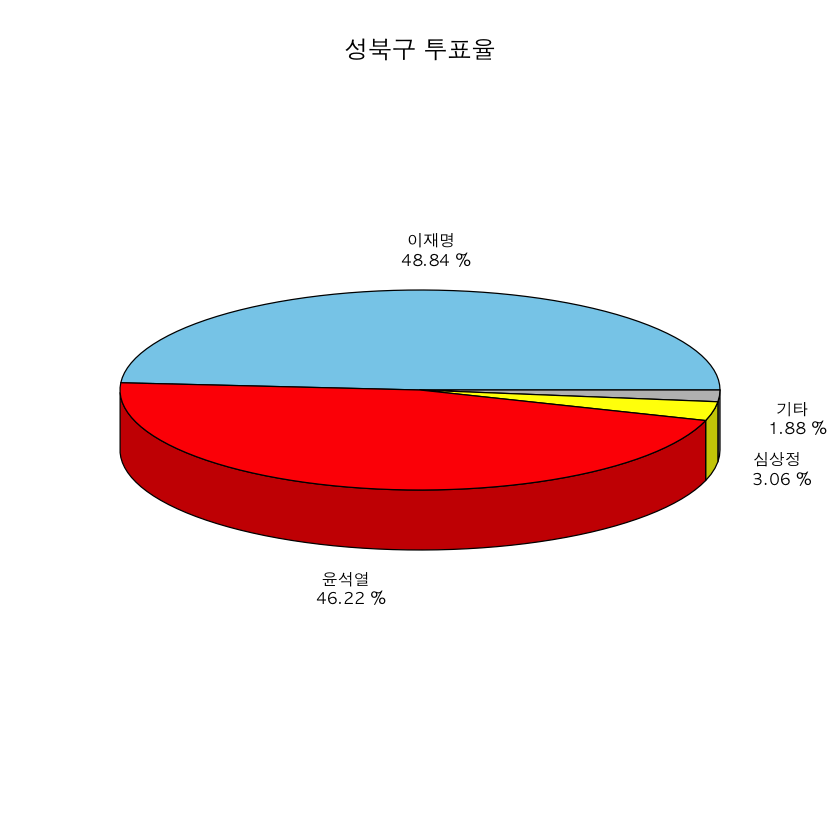

In [299]:


options(warn = -1)
ratio <- election_seongbuk_ratio
시군구 <- election_seongbuk_label
label <- paste(시군구,"\n", round(ratio,2),"%")

par(family = 'AppleGothic')
pie3D(election_seongbuk_ratio,
      main = "성북구 투표율",
      labels = label,
      labelcex = 0.8,
      col = c("sky blue",'red','yellow','grey')

    )

----
# 투표수가 가장 많은 4지역(광역시도)의 후보별 득표수 차이를 막대그래프로 시각화

In [ ]:
광역시도_3후보 <- aggregate(cbind(이재명,윤석열,심상정,투표수)~광역시도,election,sum)
광역시도_3후보 <- arrange(광역시도_3후보,desc(광역시도_3후보$투표수))
head(광역시도_3후보)

광역시도,이재명,윤석열,심상정,투표수
경기도,4297931,3859666,201113,8518854
서울특별시,2944981,3255747,180324,6501831
부산광역시,831896,1270072,47541,2200224
경상남도,794130,1237346,52591,2146882
인천광역시,913320,878560,51852,1883504
경상북도,418371,1278922,33123,1774284


In [ ]:
광역시도_4지역 <- as.matrix(광역시도_3후보[1:4,c("이재명","윤석열","심상정")])
rownames(광역시도_4지역)<-광역시도_3후보[1:4,"광역시도"]
광역시도_4지역<-t(광역시도_4지역)

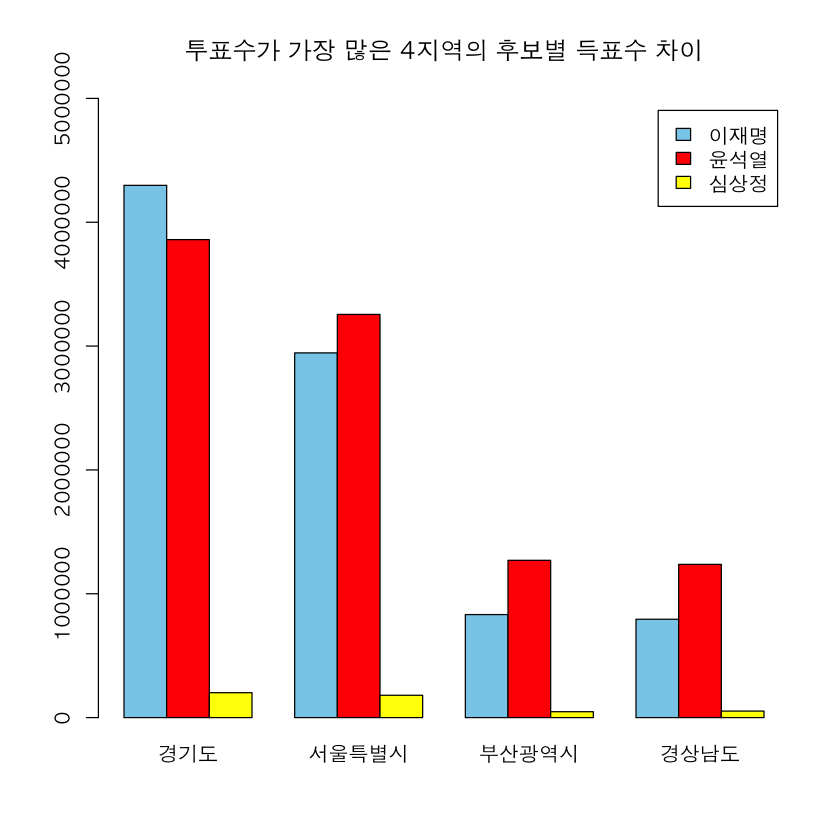

In [ ]:
par(family = "AppleGothic")
options(scipen = 100)

barplot(광역시도_4지역,
        beside = T,
        legend.text = T,
        col = c("sky blue","red","yellow"),
        ylim = c(0,5000000),
        main = "투표수가 가장 많은 4지역의 후보별 득표수 차이"

)

---
# 투표수가 높은 시군구의 후보별 득표수를 막대그래프로 시각화

In [ ]:
투표수5지역<- arrange(election,desc(election$투표수))[1:5,]
투표수5지역

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
경기도,화성시,703896,542027,283324,236055,12955,532334,98.21171
경기도,부천시,699678,532995,285227,224331,13249,522807,98.08854
경기도,남양주시,608146,460518,239179,203075,10089,452343,98.22483
서울특별시,송파구,565840,453536,180490,255166,10652,446308,98.40630
서울특별시,강서구,504185,390247,190000,181510,11100,382610,98.04303


In [ ]:
투표수5지역_3후보 <- as.matrix(투표수5지역[,c("이재명","윤석열","심상정")])
rownames(투표수5지역_3후보) <- paste(투표수5지역[,1],투표수5지역[,2])
투표수5지역_3후보 <- t(투표수5지역_3후보)
투표수5지역_3후보

,경기도 화성시,경기도 부천시,경기도 남양주시,서울특별시 송파구,서울특별시 강서구
이재명,283324,285227,239179,180490,190000
윤석열,236055,224331,203075,255166,181510
심상정,12955,13249,10089,10652,11100


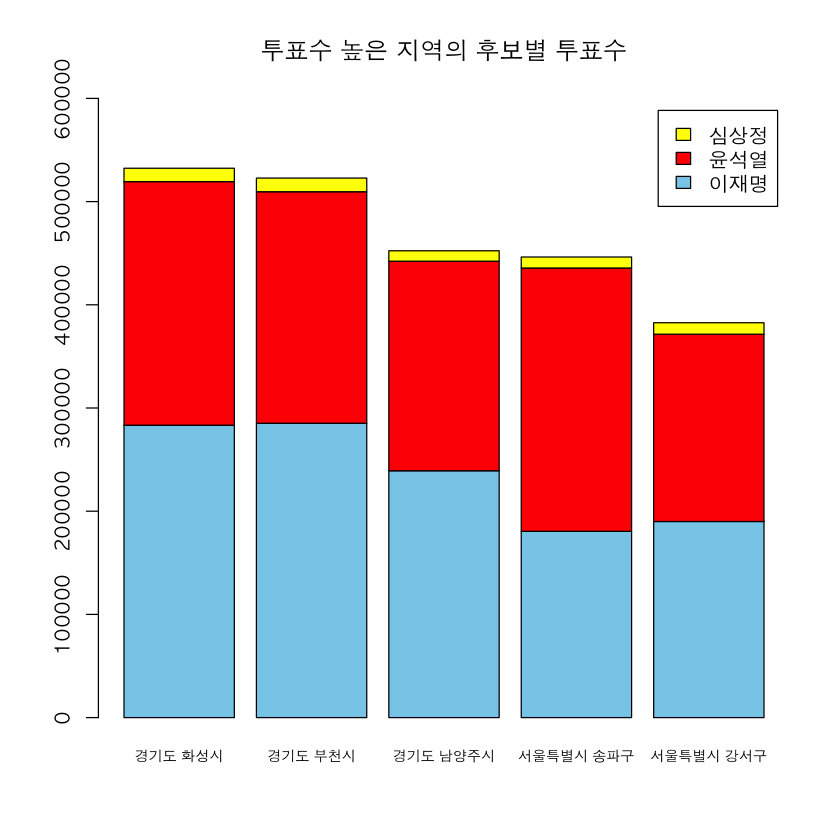

In [ ]:
par(family = "AppleGothic")
options(scipen = 100)

barplot(투표수5지역_3후보,
        legend.text = T,
        col = c("sky blue","red","yellow"),
        ylim = c(0,600000),
        main = "투표수 높은 지역의 후보별 투표수",
        cex.names = 0.7

)

In [ ]:
election$투표율 <- election$투표수/election$선거인수*100

In [ ]:
최대최소투표율<- arrange(election,desc(election$투표율))[c(1,length(election$투표율)),]

In [ ]:
최대최소투표율

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,투표율
1,경기도,과천시,63841,54194,21072,30934,1314,53320,98.38728,84.88902
248,경기도,동두천시,81075,57532,28495,26434,1125,56054,97.43099,70.96146


In [ ]:
최대최소투표율$기타 <- 최대최소투표율$투표수-최대최소투표율$electionSum

In [ ]:
최대최소투표율[,c(4:7,11)]

,투표수,이재명,윤석열,심상정,기타
1,54194,21072,30934,1314,874
248,57532,28495,26434,1125,1478


In [ ]:
최대최소투표율$이재명비율 <- 최대최소투표율$이재명/최대최소투표율$투표수*100
최대최소투표율$윤석열비율 <- 최대최소투표율$윤석열/최대최소투표율$투표수*100
최대최소투표율$심상정비율 <- 최대최소투표율$심상정/최대최소투표율$투표수*100
최대최소투표율$기타비율 <- 최대최소투표율$기타/최대최소투표율$투표수*100
최대최소투표율

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,투표율,기타,이재명비율,윤석열비율,심상정비율,기타비율
1,경기도,과천시,63841,54194,21072,30934,1314,53320,98.38728,84.88902,874,38.88253,57.08012,2.424623,1.612725
248,경기도,동두천시,81075,57532,28495,26434,1125,56054,97.43099,70.96146,1478,49.52896,45.94660,1.955433,2.569005


In [ ]:
최대최소 <- as.matrix(t(최대최소투표율[,c("이재명비율","윤석열비율","심상정비율","기타비율")]))
colnames(최대최소)<-paste(최대최소투표율$광역시도,최대최소투표율$시군구)
colnames(최대최소)[1]<-paste("최대 지역 :",colnames(최대최소)[1])
colnames(최대최소)[2]<-paste("최소 지역 :",colnames(최대최소)[2])
rownames(최대최소)<-c("이재명","윤석열","심상정","기타")

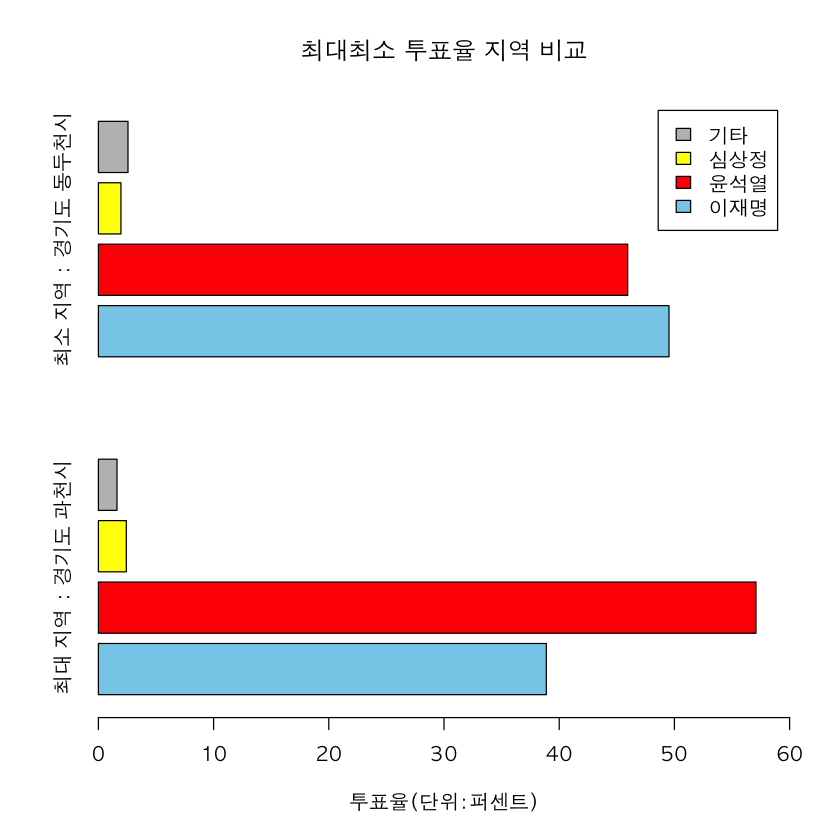

In [ ]:
par(family = "AppleGothic")


barplot(최대최소,
        beside = T,
        legend.text = T,
        col = c("sky blue","red","yellow","grey"),
        main ="최대최소 투표율 지역 비교",
        xlim = c(0,60),
        xlab = "투표율(단위:퍼센트)",
        horiz = T,
        space = c(rep(c(2,0.2,0.2,0.2),2))
       )



In [ ]:
광역시도_투표율<-aggregate(cbind(이재명,윤석열,심상정,투표수,선거인수,electionSum)~광역시도,election,sum)
광역시도_투표율

광역시도,이재명,윤석열,심상정,투표수,선거인수,electionSum
강원도,419644,544980,25031,1015458,1333621,989655
경기도,4297931,3859666,201113,8518854,11106036,8358710
경상남도,794130,1237346,52591,2146882,2809907,2084067
경상북도,418371,1278922,33123,1774284,2273028,1730416
광주광역시,830058,124511,14865,985492,1209206,969434
대구광역시,345045,1199888,31131,1611512,2046714,1576064
대전광역시,434950,464060,25445,945308,1233177,924455
부산광역시,831896,1270072,47541,2200224,2921510,2149509
서울특별시,2944981,3255747,180324,6501831,8346647,6381052
세종특별자치시,119349,101491,6780,231832,288895,227620


In [ ]:
광역시도_투표율$투표율<-광역시도_투표율$투표수/광역시도_투표율$선거인수*100


In [ ]:
광역시도_투표율 <- arrange(광역시도_투표율,desc(광역시도_투표율$투표율))
# 최대최소_광역시도 <- 광역시도_투표율[c(1:3,(length(광역시도_투표율$투표율)-2):(length(광역시도_투표율$투표율))),]
최대최소_광역시도 <- 광역시도_투표율[c(1,length(광역시도_투표율$투표율)),]


In [ ]:
최대최소_광역시도$기타 <- 최대최소_광역시도$투표수-최대최소_광역시도$electionSum

In [ ]:
최대최소_광역시도$이재명투표율<-최대최소_광역시도$이재명/최대최소_광역시도$투표수*100
최대최소_광역시도$윤석열투표율<-최대최소_광역시도$윤석열/최대최소_광역시도$투표수*100
최대최소_광역시도$심상정투표율<-최대최소_광역시도$심상정/최대최소_광역시도$투표수*100
최대최소_광역시도$기타투표율<-최대최소_광역시도$기타/최대최소_광역시도$투표수*100
최대최소_광역시도

,광역시도,이재명,윤석열,심상정,투표수,선거인수,electionSum,투표율,기타,이재명투표율,윤석열투표율,심상정투표율,기타투표율
1,광주광역시,830058,124511,14865,985492,1209206,969434,81.49910,16058,84.22778,12.63440,1.508384,1.629440
17,제주특별자치도,213130,173014,13598,409649,564354,399742,72.58724,9907,52.02747,42.23469,3.319427,2.418412


In [ ]:
최대최소_광역시도_matrix <- as.matrix(최대최소_광역시도[,c("기타투표율","심상정투표율","윤석열투표율","이재명투표율")])           
rownames(최대최소_광역시도_matrix)[1] <- paste("최고 :",최대최소_광역시도[1,1])
rownames(최대최소_광역시도_matrix)[2] <- paste("최저 :",최대최소_광역시도[2,1])
colnames(최대최소_광역시도_matrix) <- c("기타","심상정","윤석열","이재명")

In [ ]:
최대최소_광역시도_matrix <- t(최대최소_광역시도_matrix)

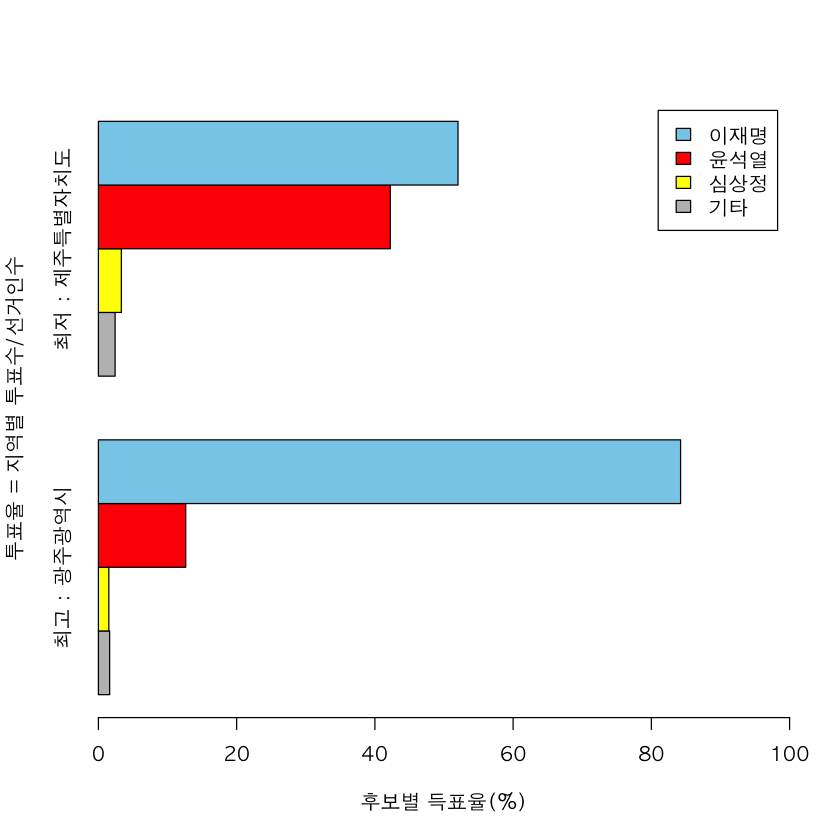

In [ ]:
par(family = "AppleGothic")


barplot(최대최소_광역시도_matrix,
        beside = T,
        horiz = T,
        legend.text = T,
        xlim = c(0,100),
        col = c("grey","yellow","red","skyblue"),
        xlab = "후보별 득표율(%)",
        ylab = "투표율 = 지역별 투표수/선거인수",
        cex.names = 1
       )


In [ ]:
election$기타 <- election[,4]-apply(election[,5:7],1,sum)
광역시도별 <- aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정,기타)~광역시도,election,sum)
광역시도별$투표율 <- (광역시도별$투표수/광역시도별$선거인수)*100
광역시도별 <- arrange(광역시도별,desc(투표율))[c(1,length(광역시도별[,1])),]
광역시도별
result <- round((광역시도별[,c(7,6,5,4)]/광역시도별[,3])*100,2)
rownames(result) <- paste(c('최고 : ','최저 :'),광역시도별$광역시도)
result

,광역시도,선거인수,투표수,이재명,윤석열,심상정,기타,투표율
1,광주광역시,1209206,985492,830058,124511,14865,16058,81.49910
17,제주특별자치도,564354,409649,213130,173014,13598,9907,72.58724


,기타,심상정,윤석열,이재명
최고 : 광주광역시,1.63,1.51,12.63,84.23
최저 : 제주특별자치도,2.42,3.32,42.23,52.03


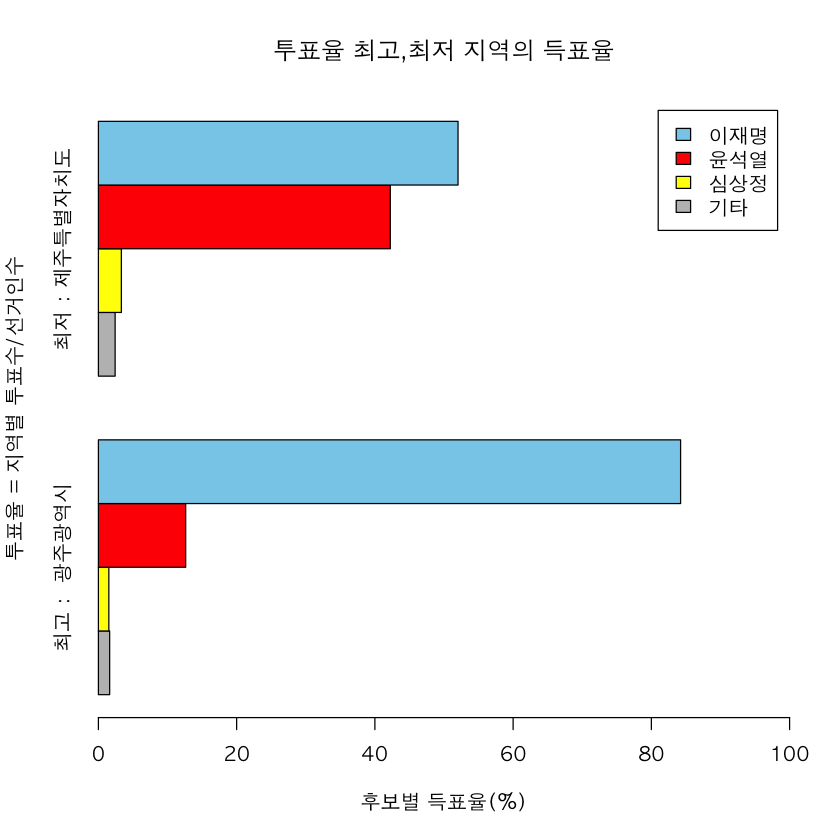

In [ ]:
par(family = "AppleGothic",bg='white')
barplot(t(result),
         beside=T,
         xlab="후보별 득표율(%)",
         xlim=c(0,100),
         col=c('grey','yellow','red','skyblue'),
         main = "투표율 최고,최저 지역의 득표율",
         ylab = "투표율 = 지역별 투표수/선거인수",
         legend.text=T,
         horiz=T
        )

In [ ]:
ratio <-data.frame(광역시도=election$광역시도,시군구=election$시군구,투표율=election$투표수/election$선거인수*100,
이재명=election$이재명/election$투표수*100,
윤석열=election$윤석열/election$투표수*100,
심상정=election$심상정/election$투표수*100)
ratio <-arrange(ratio,desc(투표율))

#지역별 75넘는곳
지역75<- subset(ratio,투표율>=75)


#이재명 50 넘는곳
이재명50<- subset(ratio,투표율>=75&이재명>50)

#윤석열 50 넘는곳
윤석열50 <- subset(ratio,투표율>=75&윤석열>50)


merge1 <-merge(x=count(지역75,광역시도),y=count(이재명50,광역시도),by.x='광역시도',by.y='광역시도',all.x=T)
merge2<-merge(x=merge1,y=count(윤석열50,광역시도),by.x='광역시도',by.y='광역시도',all.x=T)
colnames(merge2) <- c('광역시도','지역별75','이재명50','윤석열50')
merge2[is.na(merge2)] <-0
merge2

광역시도,지역별75,이재명50,윤석열50
강원도,14,0,14
경기도,26,12,6
경상남도,18,0,18
경상북도,22,0,22
광주광역시,5,5,0
대구광역시,8,0,8
대전광역시,4,0,1
부산광역시,8,0,8
서울특별시,24,2,8
세종특별자치시,1,1,0


In [ ]:
team<- t(as.matrix(merge2[,2:4]))
team

지역별75,14,26,18,22,5,8,4,8,24,1,5,4,22,15,8,8
이재명50,0,12,0,0,5,0,0,0,2,1,0,0,22,15,0,0
윤석열50,14,6,18,22,0,8,1,8,8,0,3,3,0,0,8,7


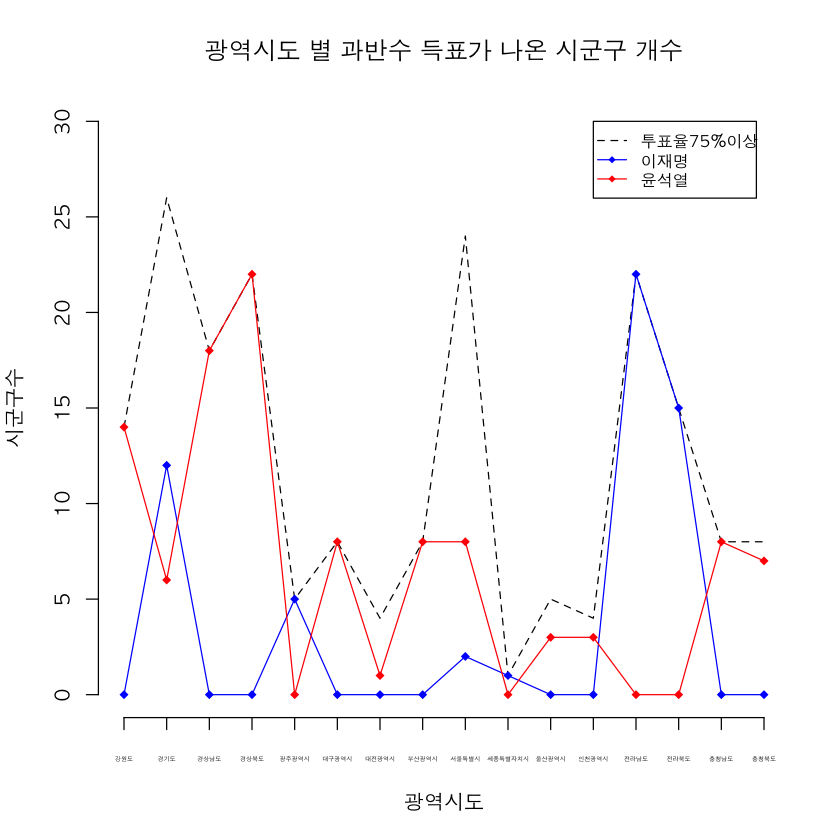

In [ ]:
par(family ="AppleGothic", bg='white')
options(warn = -1)
plot(team[1,],
    type='l',
     ylim=c(0,30),
     col='black',
     axes =F, #x,y 좌표 frame 제거
     ann=F, #x,y label 제거
     lty = 2,

    )
# x축과 x축의 라벨을 설정
axis(1, at=1:16, lab=merge2$광역시도,cex.axis=0.3)
# y축과 y축의 라벨을 설정
axis(2, ylim=c(0,30))
# main title 지정
title(main="광역시도 별 과반수 득표가 나온 시군구 개수",col.main="black")

# x축 title(label) 지정
title(xlab="광역시도", col.lab="black")

# y축 title(label) 지정
title(ylab="시군구수", col.lab="black")
lines(team[2,],
      type='o',
       pch=18,
      lty=1,
     col="blue")

lines(team[3,],
      type='o',
       pch=18,
      lty=1,
     col="red")
# 범례
legend(12,30, #x,y 좌표값 (왼쪽위에 해당하는점)
      c("투표율75%이상","이재명","윤석열"),
      col=c("black","blue","red"),
      pch=c(NA,18,18),
      lty=c(2,1,1),
      cex=0.8  #기본 값이 1 
       
      )

In [ ]:
votes

광역시도,투표수
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504
경상북도,1774284
대구광역시,1611512
충청남도,1324660
전라남도,1282168
전라북도,1235212


In [ ]:
# 수도권 : 경기도, 인천광역시, 서울특별시
# 강원권 : 강원도
# 충청권 : 충천북도, 충천남도, 대전광역시, 세종특별시 
# 호남권 : 전라남도,전라북도,제주특별시, 광주광역시
# 영남권 : 경상남도,경상북도,대구광역시,부산광역시,울산광역시

In [ ]:
광역시도_후보별_투표율<-aggregate(cbind(이재명,윤석열,심상정,투표수,선거인수,electionSum)~광역시도,election,sum)
광역시도_후보별_투표율$권역<-c("강원권","수도권","영남권","영남권","호남권","영남권","충청권","영남권","수도권","충청권","영남권","수도권","호남권","호남권","호남권","충청권","충청권")




권역_후보별_투표율 <- aggregate(cbind(이재명,윤석열,심상정,투표수,선거인수,electionSum)~권역,광역시도_후보별_투표율,sum)
권역_후보별_투표율$투표율 <- 권역_후보별_투표율$투표수/권역_후보별_투표율$선거인수*100
권역_후보별_투표율<-arrange(권역_후보별_투표율,desc(권역_후보별_투표율$투표율))

권역_후보별_투표율$이재명비율 <- 권역_후보별_투표율$이재명/권역_후보별_투표율$투표수*100
권역_후보별_투표율$윤석열비율 <- 권역_후보별_투표율$윤석열/권역_후보별_투표율$투표수*100
권역_후보별_투표율$심상정비율 <- 권역_후보별_투표율$심상정/권역_후보별_투표율$투표수*100

권역_후보별_투표율[,1]

권역_후보별_투표율2<- t(권역_후보별_투표율[,9:11])
colnames(권역_후보별_투표율2)<-c(권역_후보별_투표율[,1])
권역_후보별_투표율2





[1] "호남권" "영남권" "수도권" "강원권" "충청권"

,호남권,영남권,수도권,강원권,충청권
이재명비율,80.636577,31.724856,48.249768,41.325589,45.42098
윤석열비율,15.843570,63.560679,47.289894,53.668394,49.62439
심상정비율,1.640707,2.192608,2.563205,2.464996,2.57672


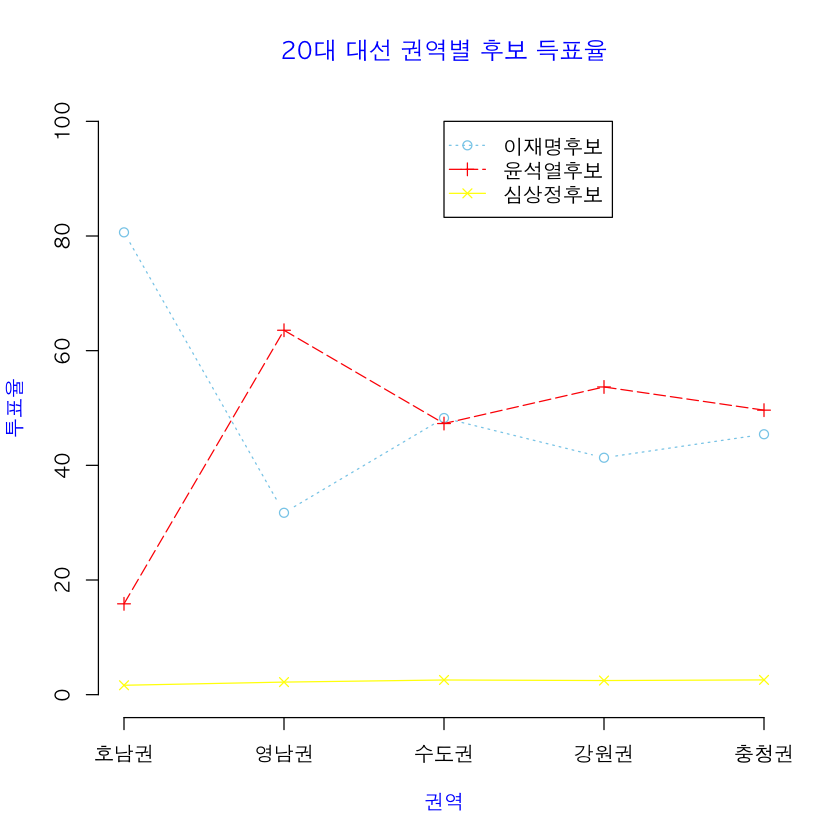

In [ ]:
par(family = "AppleGothic")


이 <- 권역_후보별_투표율2[1,]
윤 <- 권역_후보별_투표율2[2,]
심 <- 권역_후보별_투표율2[3,]
plot(이,
     type ="b",
     ylim=c(0,100),
     axes=F,
     ann=F,
     col="sky blue",
     lty=3
    )
legend(3,100,
      c("이재명후보","윤석열후보","심상정후보"),
      col=c("sky blue","red","yellow"),
      pch=c(21,3,4),
      lty=c(3,5,1)
      )
title(main="20대 대선 권역별 후보 득표율", col.main="blue")
title(xlab="권역", col.lab="blue")
title(ylab="투표율", col.lab="blue")
axis(1,at=1:5,lab=c('호남권','영남권','수도권','강원권','충청권'))
axis(2,ylim=c(0,100))
lines(윤,
      type="o",
      pch=3,
      col="red",
      lty=5
     )
lines(심,
      type="o",
      pch=4,
      col="yellow",
      lty=1
     )

지역,선거인수,투표수,이재명,윤석열,심상정,ratio,이ratio,윤ratio,심ratio
호남권,4887963,3912521,3154923,619883,64193,80.04,80.64,15.84,1.64
영남권,10993369,8468363,2686576,5382549,185678,77.03,31.72,63.56,2.19
수도권,21971908,16904189,8156232,7993973,433289,76.94,48.25,47.29,2.56
강원권,1333621,1015458,419644,544980,25031,76.14,41.33,53.67,2.46
충청권,4602633,3464133,1573443,1719055,89261,75.26,45.42,49.62,2.58


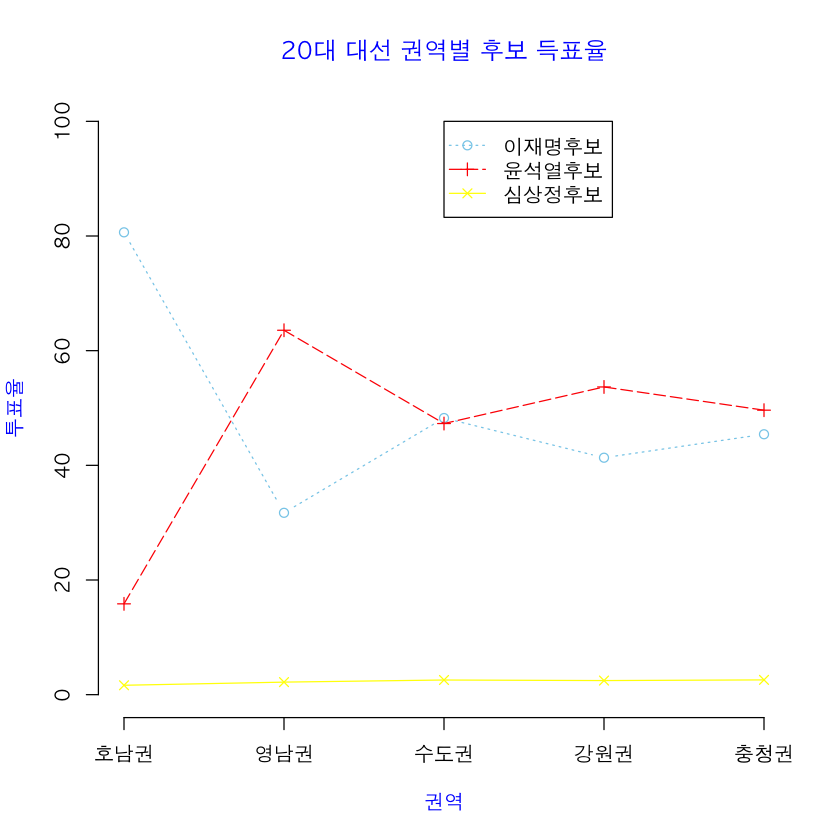

In [ ]:
par(family="AppleGothic")
options(warn=-1)
수도권 <-c('서울특별시','인천광역시','경기도')
강원권 <-'강원도'
영남권 <- c('경상북도','경상남도','대구광역시','부산광역시','울산광역시')
충청권 <- c('충청북도','충청남도','세종특별자치시','대전광역시')
호남권 <- c('전라남도','전라북도','제주특별자치도','광주광역시')

election$지역 <- ifelse(election$광역시도 %in% 수도권,'수도권',
               ifelse(election$광역시도 %in% 강원권,'강원권',
                     ifelse(election$광역시도 %in% 영남권,'영남권',
                           ifelse(election$광역시도 %in% 충청권,'충청권','호남권'))))
elec1 <- aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정)~지역,election,sum)
elec1$ratio <- round(elec1$투표수/elec1$선거인수*100,2)
elec1$이ratio <- round(elec1$이재명/elec1$투표수*100,2)
elec1$윤ratio <- round(elec1$윤석열/elec1$투표수*100,2)
elec1$심ratio <- round(elec1$심상정/elec1$투표수*100,2)
arrange(elec1,desc(ratio))
elec2 <- t(arrange(elec1,desc(ratio))[1:5,7:10])

colnames(elec2)=c('호남권','영남권','수도권','강원권','충청권')
이 <- elec2[2,]
윤 <- elec2[3,]
심 <- elec2[4,]
plot(이,
     type ="b",
     ylim=c(0,100),
     axes=F,
     ann=F,
     col="sky blue",
     lty=3
    )
legend(3,100,
      c("이재명후보","윤석열후보","심상정후보"),
      col=c("sky blue","red","yellow"),
      pch=c(21,3,4),
      lty=c(3,5,1)
      )
title(main="20대 대선 권역별 후보 득표율", col.main="blue")
title(xlab="권역", col.lab="blue")
title(ylab="투표율", col.lab="blue")
axis(1,at=1:5,lab=c('호남권','영남권','수도권','강원권','충청권'))
axis(2,ylim=c(0,100))
lines(윤,
      type="o",
      pch=3,
      col="red",
      lty=5
     )
lines(심,
      type="o",
      pch=4,
      col="yellow",
      lty=1
     )

In [ ]:
election_득표율 <- election

In [ ]:
election_득표율 <- election

election_득표율$이재명비율 <- election_득표율$이재명/election_득표율$투표수*100
election_득표율$윤석열비율 <- election_득표율$윤석열/election_득표율$투표수*100
election_득표율$심상정비율 <- election_득표율$심상정/election_득표율$투표수*100


election_득표율$이재명오차율 <- abs(election_득표율$이재명비율-47.83)
election_득표율$윤석열오차율 <- abs(election_득표율$윤석열비율-48.56)
election_득표율$심상정오차율 <- abs(election_득표율$심상정비율-2.37)
오차1이내 <- subset(election_득표율,election_득표율$이재명오차율 <= 1 & election_득표율$윤석열오차율 <= 1 & election_득표율$심상정오차율)

In [ ]:
오차1이내<- subset(오차1이내,오차1이내$이재명 < 오차1이내$윤석열)

In [ ]:
오차1이내$오차합<- 오차1이내$이재명오차율 + 오차1이내$윤석열오차율 + 오차1이내$심상정오차율

In [ ]:
그래프 <- as.matrix(arrange(오차1이내,오차1이내$오차합)[,c(2,18)])
그래프
graph<-그래프[,2]
graph<-as.numeric(graph)
graph
그래프[,1]

시군구,심상정오차율
유성구,0.4400612
미추홀구,0.3736678
동구,0.5529190
대덕구,0.3517427
청주시흥덕구,0.5441695


[1] 0.4400612 0.3736678 0.5529190 0.3517427 0.5441695

[1] "유성구"       "미추홀구"     "동구"         "대덕구"       "청주시흥덕구"

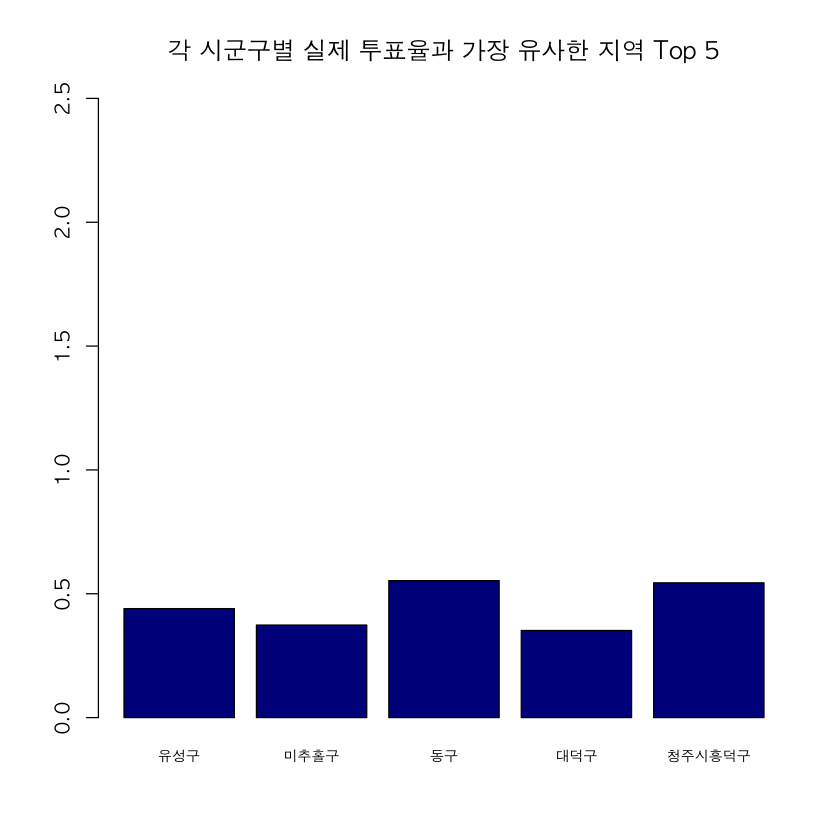

In [ ]:
par(family = "AppleGothic")

barplot(graph,
        names = 그래프[,1],
        ylim = c(0,2.5),
        main = "각 시군구별 실제 투표율과 가장 유사한 지역 Top 5",
        col = "darkblue",
        cex.names = 0.7

       )